# Exploring Data

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("data/Immoweb_Data_Clean.csv")

In [3]:
#Create "Regions"
df['region'] = df.apply(lambda x: round(x.postcode/100),axis=1)
df

,locality,type,sub_type,price,type_of_sale,amount_of_rooms,area,has_full_kitchen,is_furnished,has_open_fire,has_terrace,has_garden,garden_area,amount_of_facades,has_pool,building_state,land_area,postcode,region
0,gent,house,mansion,819000,for sale,4.0,310.0,True,False,False,True,False,0,4.0,False,as new,495.0,9000.0,90
1,knokke-heist,house,exceptional property,5850000,for sale,6.0,305.0,True,False,False,True,False,0,4.0,False,good,1934.0,8300.0,83
2,schilde,house,villa,4995000,for sale,5.0,625.0,True,False,False,True,False,0,4.0,False,unknown,33015.0,2970.0,30
3,overijse,house,castle,9500000,for sale,12.0,1100.0,True,False,False,True,False,0,4.0,True,as new,501100.0,3090.0,31
4,saint-gilles,house,exceptional property,4950000,for sale,6.0,1500.0,True,False,False,True,True,3500,4.0,True,as new,6500.0,1060.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8539,oudergem,apartment,apartment,501500,for sale,2.0,102.0,True,False,False,True,False,0,2.0,False,as new,102.0,1160.0,12
8540,ninove,house,house,498521,for sale,3.0,176.0,True,False,False,False,False,0,4.0,False,unknown,1096.0,9400.0,94
8541,antwerpen,house,apartment block,500000,for sale,7.0,280.0,True,False,False,False,False,0,3.0,False,to renovate,357.0,2000.0,20
8542,brussel,apartment,apartment,499000,for sale,4.0,161.0,True,False,False,False,False,0,4.0,False,as new,161.0,1000.0,10


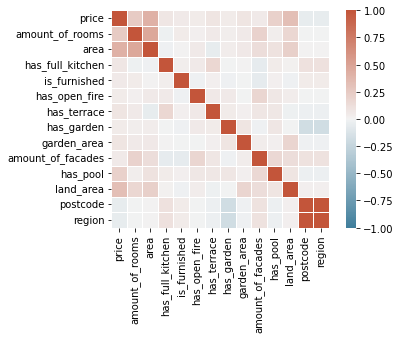

<Figure size 1500x1500 with 0 Axes>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=df.corr(), linewidths=0.5, square=True, cmap=cmap, vmax=1, vmin=-1, center=0)

plt.yticks(rotation=0)  
plt.figure(figsize=(15,15),dpi=100)
plt.show()

In [5]:
df.columns.to_list()

['locality',
 'type',
 'sub_type',
 'price',
 'type_of_sale',
 'amount_of_rooms',
 'area',
 'has_full_kitchen',
 'is_furnished',
 'has_open_fire',
 'has_terrace',
 'has_garden',
 'garden_area',
 'amount_of_facades',
 'has_pool',
 'building_state',
 'land_area',
 'postcode',
 'region']

In [53]:
df.groupby("type").count()

,locality,sub_type,price,type_of_sale,amount_of_rooms,area,has_full_kitchen,is_furnished,has_open_fire,has_terrace,has_garden,garden_area,amount_of_facades,has_pool,building_state,land_area,postcode,region
type,,,,,,,,,,,,,,,,,,
apartment,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462
house,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082,6082


In [6]:
#CREATE X & Y

features = [
 'amount_of_rooms',
 'area',
 'has_full_kitchen',
 'is_furnished',
 'has_open_fire',
 'has_terrace',
 'has_garden',
 'garden_area',
 'amount_of_facades',
 'has_pool',
 'land_area',
 'region']

X = df[features]
y = df['price']


# MODEL EXPLORATION

##### Basic

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.2798250544699237

In [8]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
krr.score(X_test,y_test)

#Takes longer , similar results

0.26927932322760206

In [9]:
from sklearn.linear_model import ElasticNet
net = ElasticNet()
net.fit(X_train, y_train)
net.score(X_test,y_test)

#worse results

0.2559651405584167

In [10]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

#similar results


0.2530362918529486

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=200,max_depth=10)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

#Best results


0.5124447414833292

In [12]:
from joblib import load
reg = load("model/GBR.joblib")

reg.score(X_test,y_test)

0.8107001166009091

In [46]:
#reg.predict(X_test.loc[0])
x = X_test.iloc[0].values.reshape(1,-1)
reg.predict(x)


f:\Becode\Repos\challenge-deployment\deploy-app\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([[11.0, 463.0, True, False, False, True, False, 0, 4.0, False,
        9453.0, 46]], dtype=object)

In [55]:
p = X_test.iloc[0]
x = pd.DataFrame(p)
x = x.transpose()
x
#reg.predict(x)

,amount_of_rooms,area,has_full_kitchen,is_furnished,has_open_fire,has_terrace,has_garden,garden_area,amount_of_facades,has_pool,land_area,region
5639,11.0,463.0,True,False,False,True,False,0,4.0,False,9453.0,46


In [13]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

regr.score(X_test,y_test)

#takes longer , worse results

-0.06250092226969173